In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.pandas.set_option('display.max_columns',None)

## 1. Exploring Data : 

In [3]:
## Function for importing dataset : 

## Column names : 
columns = {0:'engineNumber',1:'cycleNumber',2:'opSetting1',3:'opSetting2',4:'opSetting3',5:'sensor1',6:'sensor2',
           7:'sensor3',8:'sensor4',9:'sensor5',10:'sensor6',11:'sensor7',12:'sensor8',13:'sensor9',14:'sensor10',
           15:'sensor11',16:'sensor12',17:'sensor13',18:'sensor14',19:'sensor15',20:'sensor16',
           21:'sensor17',22:'sensor18',23:'sensor19',24:'sensor20',25:'sensor21'}

def getting_df(file_no, columns): 
    df_train = pd.read_csv(f"dataset/train_FD00{file_no}.txt" , sep=' ' , header=None).drop(columns=[26,27])
    df_test = pd.read_csv(f"dataset/test_FD00{file_no}.txt" , sep=' ' , header=None).drop(columns=[26,27])
    df_RUL = pd.read_csv(f"dataset/RUL_FD00{file_no}.txt" , sep=' ' , header=None).drop(columns=[1])

    ## Adding column names : 
    df_train = df_train.rename(columns=columns)
    df_test = df_test.rename(columns=columns)
    df_RUL = df_RUL.rename(columns={0:'RUL'})
    return df_train , df_test , df_RUL 


In [4]:
df_train1 , df_test1 , df_RUL1 = getting_df(file_no=1 , columns=columns)
df_train1.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


#### 1.1 Visualizing  Data :    

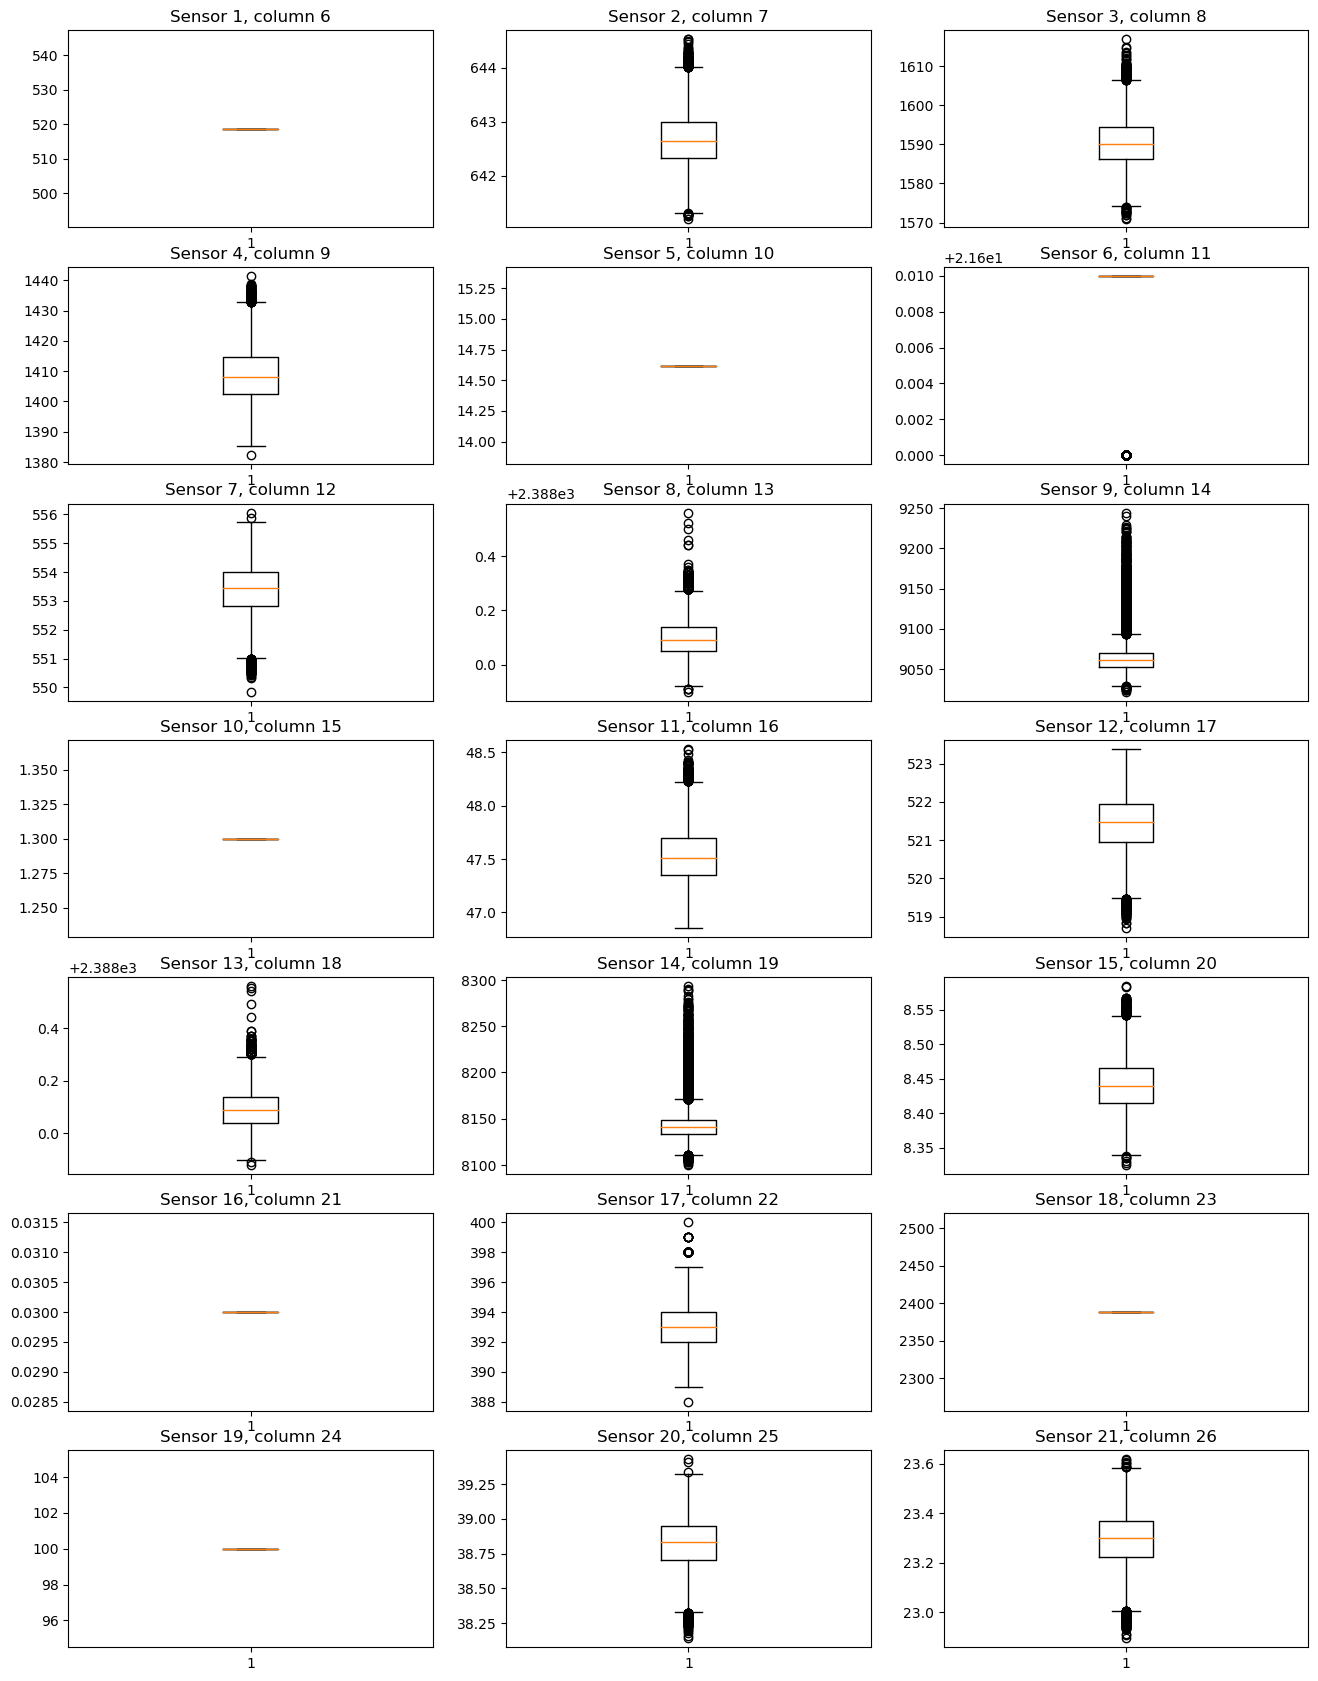

In [5]:
plt.figure(figsize = (16, 21))

for i in range(21):
    temp_data = df_train1.iloc[:,i+5]
    plt.subplot(7,3,i+1)
    plt.boxplot(temp_data)
    plt.title("Sensor " + str(i+1) + ", column "+ str(i+6))
plt.show()

From the above plot we see that columns 6, 10, 11, 15, 21, 23 and 24 contain constant values

- These columns corresponds to sensors 1, 5, 6, 10, 16, 18 and 19
- Useful sensors are therefore 2, 3, 4, 7, 8, 9, 11, 12 ,13 ,14 ,15 ,17, 20, 21

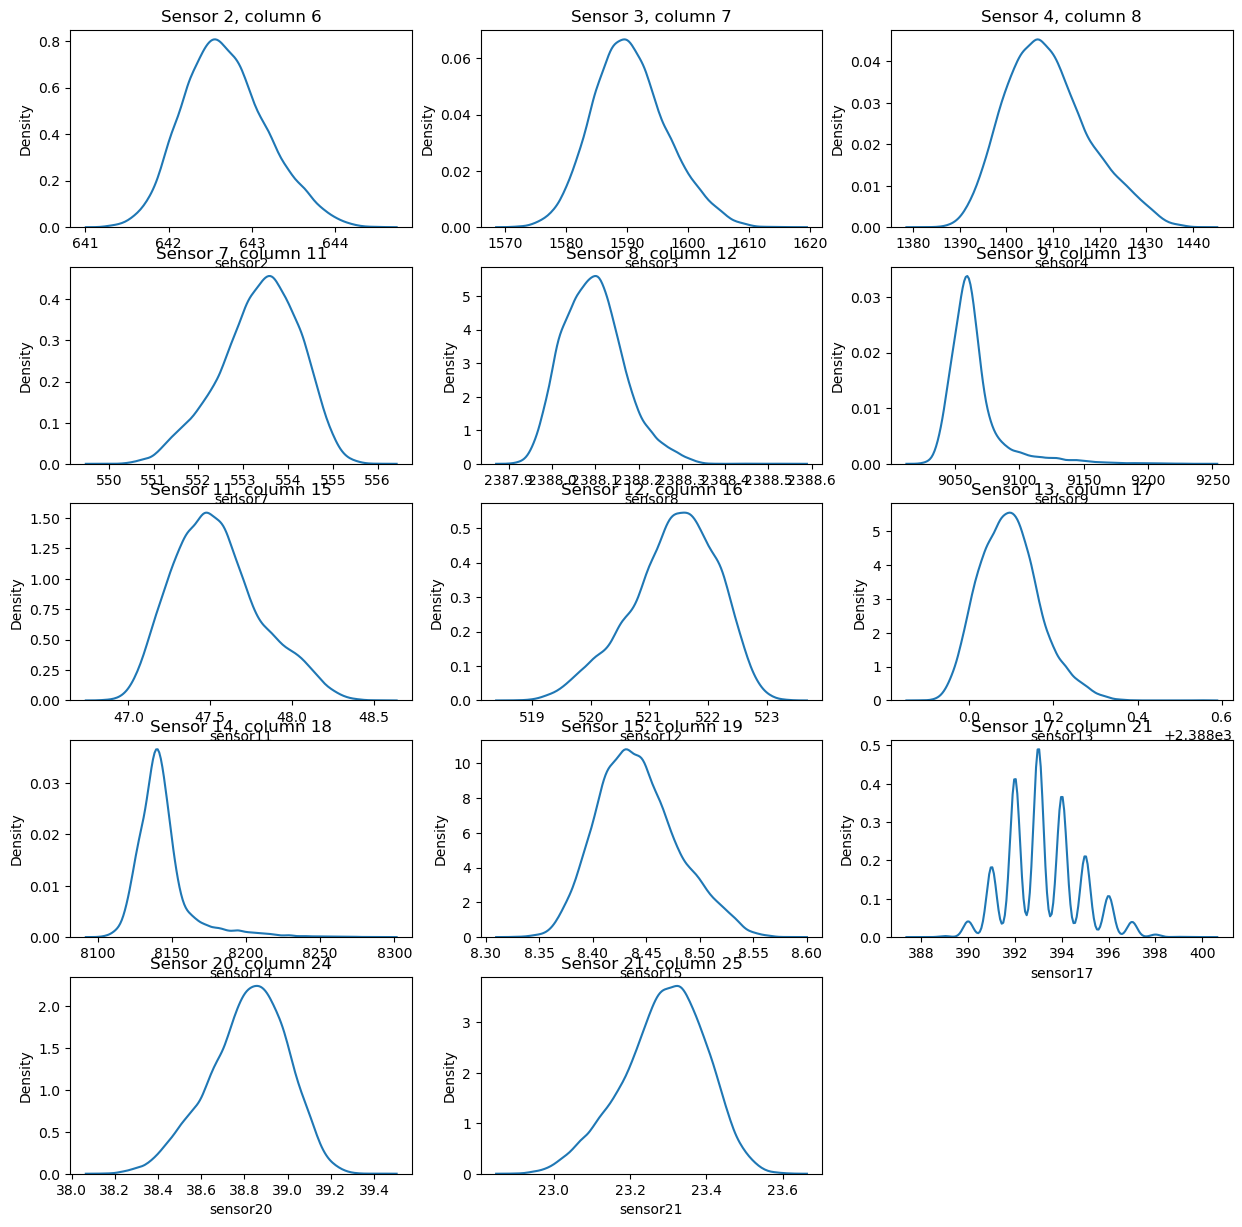

In [6]:
### KDE plot : 
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp = df_train1.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp, legend = False)
    plt.title("Sensor " + str(j-4) + ", column "+ str(j))
plt.show()

An algorithm generalizes well (i.e., its performance on unseen data is good) if unseen data is similar in distribution to training data. Unseen data need not be exactly of same distribution as of training data but it should not be very different from training data.

So let's compare the distribution of training and test data:

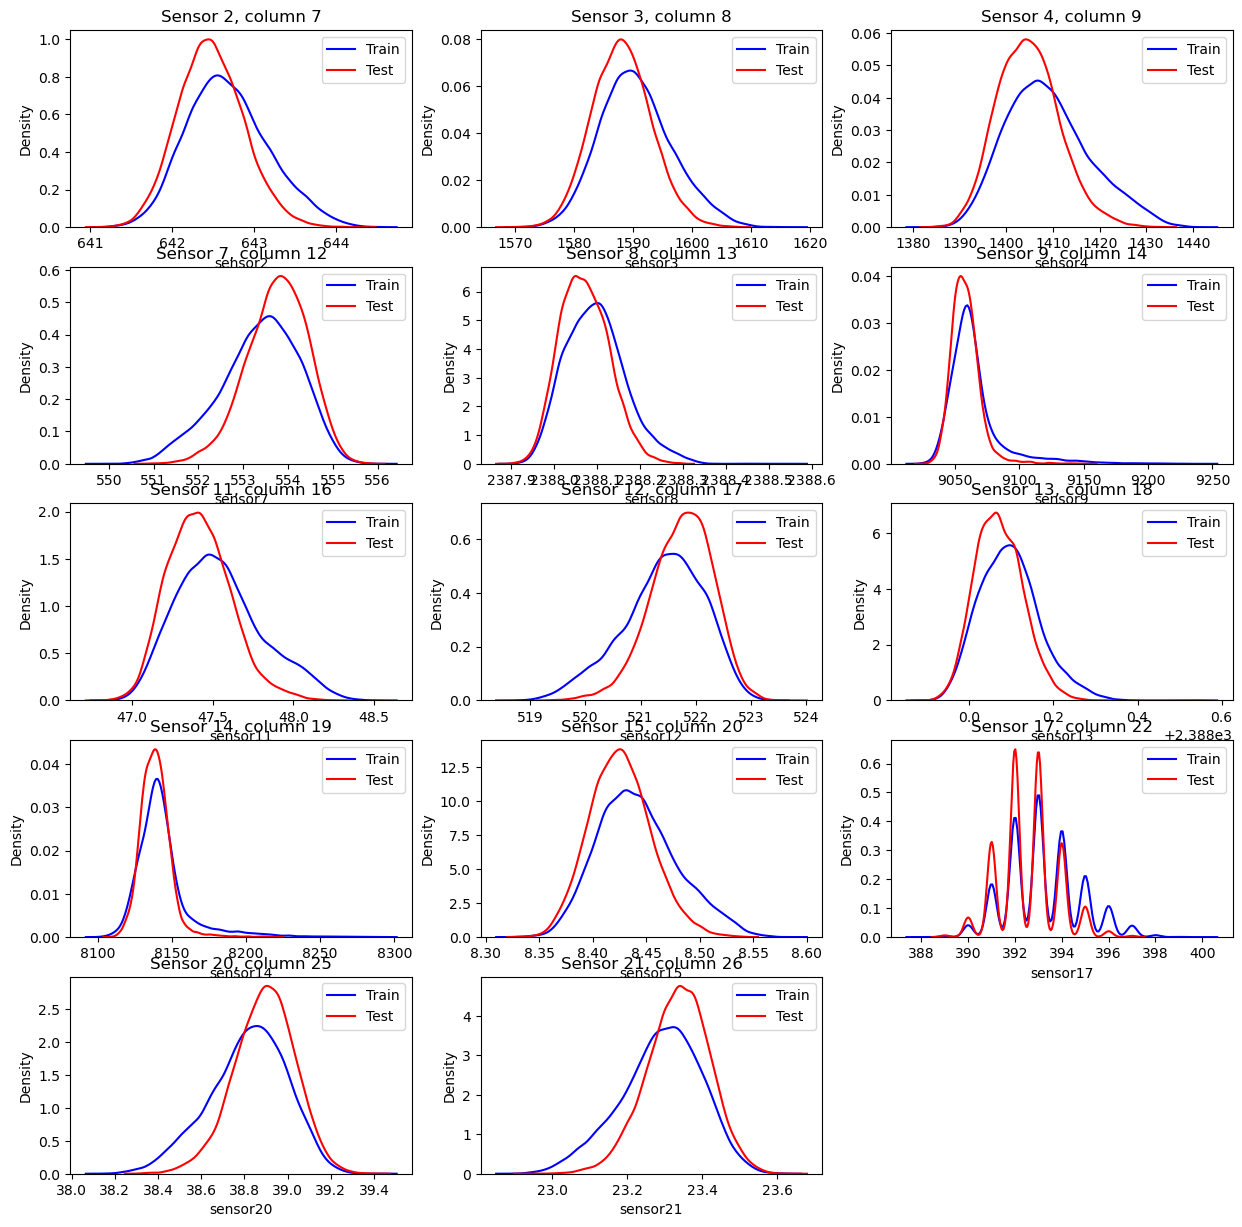

In [7]:
## Comparision of train and test Dataset : 
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_train = df_train1.iloc[:, j]
    temp_test = df_test1.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp_train, legend = False, color = "blue", label = "Train")
    sns.kdeplot(temp_test, legend = False, color = "red", label = "Test")
    plt.title("Sensor " + str(j-4) + ", column "+ str(j+1))
    plt.legend()
plt.show()

In [8]:
## Dropping Unwanted Columns 
columns_to_keep = ['cycleNumber', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9',
                   'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
                   'sensor17', 'sensor20', 'sensor21']

columns_to_drop=['opSetting1', 'opSetting2', 'opSetting3',
                 'sensor1','sensor5','sensor6','sensor10','sensor16','sensor18', 'sensor19']

#### 1.2 Preproccesing the Data

In [9]:
def dropping_col(columns_to_drop , df): 
    df  = df.drop(columns=columns_to_drop)
    return df 

In [10]:
## Dropping unwanted Columns : 
df_train1 = dropping_col(columns_to_drop=columns_to_drop,df = df_train1)
df_train1.head()

,engineNumber,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [11]:
df_test1 = dropping_col(columns_to_drop=columns_to_drop , df=df_test1)
df_test1.head()

,engineNumber,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


In [12]:
df_RUL1.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [13]:
## Creating function for adding  RUL in  train dataset : 
def adding_RUL_col_train(df_train): 
    data = df_train.copy()
    cycle_to_failure = data.groupby('engineNumber')['cycleNumber'].max()
    d1 = dict(cycle_to_failure) 
    list1 = []
    for i in range(data.shape[0]): 
        list1.append(cycle_to_failure[data['engineNumber'][i]] - data['cycleNumber'][i])
    data['RUL'] = list1
    return data


In [14]:
## Creating function for adding  RUL in  test dataset : 
def adding_RUL_col_test(df_test , df_RUL): 
    data = df_test.copy()
    cycle_to_failure = (data.groupby('engineNumber')["cycleNumber"].max()  + np.array(df_RUL['RUL']))
    d1 = dict(cycle_to_failure) 
    list1 = []
    for i in range(data.shape[0]): 
        list1.append(cycle_to_failure[data['engineNumber'][i]] - data['cycleNumber'][i])
    data['RUL'] = list1
    return data

In [15]:
df_test1 = adding_RUL_col_test(df_test=df_test1 , df_RUL=df_RUL1)

#### 1.3 Saving proccesed Data into CSV : 
- here we will perform all operations discussed above

In [16]:
### Function for saving files into CSV : 
def saving_to_csv(df , file_no , file_type): 
    import os 
    os.makedirs("Proccessed_data" , exist_ok=True)
    df.to_csv(f"Proccessed_data/{file_type}_FD00{file_no}.csv")
    
## Columns need to add and drop : 
columns = {0:'engineNumber',1:'cycleNumber',2:'opSetting1',3:'opSetting2',4:'opSetting3',5:'sensor1',6:'sensor2',
           7:'sensor3',8:'sensor4',9:'sensor5',10:'sensor6',11:'sensor7',12:'sensor8',13:'sensor9',14:'sensor10',
           15:'sensor11',16:'sensor12',17:'sensor13',18:'sensor14',19:'sensor15',20:'sensor16',
           21:'sensor17',22:'sensor18',23:'sensor19',24:'sensor20',25:'sensor21'}

columns_to_drop=['opSetting1', 'opSetting2', 'opSetting3',
                 'sensor1','sensor5','sensor6','sensor10','sensor16','sensor18', 'sensor19']

### proccesing and saving files : 
for i in range(1,5): 
    ## Reading Files : 
    df_train , df_test , df_RUL = getting_df(file_no=i , columns=columns)
    
    ## Deleting Unwanted Columns : 
    df_train = dropping_col(columns_to_drop=columns_to_drop , df=df_train)
    df_test = dropping_col(columns_to_drop=columns_to_drop , df=df_test)
    
    ## Adding RUL columns : 
    df_train = adding_RUL_col_train(df_train=df_train)
    df_test = adding_RUL_col_test(df_test=df_test,df_RUL=df_RUL)
    df_test = df_test.groupby('engineNumber').last().reset_index()
    
    ## Saving Files : 
    saving_to_csv(df=df_train.set_index('engineNumber') , file_no=i , file_type='train')
    saving_to_csv(df=df_test.set_index('engineNumber') , file_no=i , file_type='test')

## 2 Model Training : 

In [16]:
## Training data : 
df1 = pd.read_csv('Proccessed_data/train_FD001.csv',index_col=False)
df2 = pd.read_csv('Proccessed_data/train_FD002.csv',index_col=False)
df3 = pd.read_csv('Proccessed_data/train_FD003.csv',index_col=False)
df4 = pd.read_csv('Proccessed_data/train_FD004.csv',index_col=False)

In [17]:
df1.sample(5)

,engineNumber,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL
10457,53,123,643.32,1595.18,1412.45,554.14,2388.09,9079.42,47.51,521.25,2388.10,8157.87,8.4609,394,38.69,23.2218,72
10246,52,125,642.56,1587.06,1406.86,552.47,2388.17,9058.53,47.49,521.14,2388.14,8138.02,8.4084,394,38.87,23.3494,88
8466,44,22,642.64,1586.07,1402.21,554.02,2388.03,9068.32,47.45,522.39,2388.06,8146.76,8.3947,391,38.87,23.2809,170
1681,8,119,643.38,1594.55,1416.89,552.61,2388.25,9046.84,47.85,520.71,2388.21,8127.09,8.4645,395,38.68,23.2805,31
17151,84,267,643.68,1606.08,1430.13,550.64,2388.25,9079.24,48.17,519.77,2388.23,8149.66,8.5367,396,38.49,23.1018,0


In [18]:
## Preparing train , test data : 

## FD001 : 
x_train1 ,y_train1 = df1.drop(columns=['RUL']) , df1['RUL']
df1_test = pd.read_csv('Proccessed_data/test_FD001.csv',index_col=False)

In [19]:
x_test1 ,y_test1 = df1_test.drop(columns=['RUL']) , df1_test['RUL']

In [21]:
##  Function for evaluating model performance : 
from sklearn.metrics import r2_score  , mean_squared_error 
def evaluate(model,x_train_arr,x_test_arr ,y_train_true ,y_test_true):
    y_train_pred = model.predict(x_train_arr)
    y_test_pred = model.predict(x_test_arr)
    
    r2_score_train = r2_score(y_pred=y_train_pred , y_true =y_train_true)
    r2_score_test = r2_score(y_pred= y_test_pred , y_true = y_test_true)
    #accuracy_score_train = accuracy_score(y_pred=y_train_pred ,y_true=y_train_true)
    #accuracy_score_test = accuracy_score(y_pred=y_test_pred ,y_true=y_test_true)
    rmse_train = np.sqrt(mean_squared_error(y_pred=y_train_pred ,y_true=y_train_true))
    rmse_test = np.sqrt(mean_squared_error(y_pred=y_test_pred ,y_true=y_test_true))
    
    model_accuracy = (2 * (r2_score_train * r2_score_test)) / (r2_score_train + r2_score_test)
    
    message = f""" 
                Model name : {model} ,
                r2_score_train : {r2_score_train :.3%} , 
                r2_score_test : {r2_score_test :.3%} ,
                rmse_train : {rmse_train}, 
                rmse_test : {rmse_test} 
                Model Accuracy : {model_accuracy:.3%}
                    
                    """
    print(message)

### 2.1 Experimenting With Baseline Models : 

#### 2.1.1 Linear Regression: 

In [23]:
### Standard Scaling the dataset: 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train1_scaled = scaler.fit_transform(x_train1)
x_test1_scaled = scaler.transform(x_test1)

In [24]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train1_scaled,y_train1)
evaluate(model=linear,
         x_train_arr=x_train1_scaled,
         x_test_arr=x_test1_scaled ,
         y_train_true=y_train1 ,
         y_test_true=y_test1)

 
                Model name : LinearRegression() ,
                r2_score_train : 66.958% , 
                r2_score_test : 42.217% ,
                rmse_train : 39.59310521746382, 
                rmse_test : 31.588573847430556 
                Model Accuracy : 51.784%
                    
                    


- Lets try clipping RUL values to upper limit of 125

#### 2.1.2 Linear Regression with clipping : 

In [25]:
## clipping to 125
y_train_clipped = y_train1.clip(upper=125)

In [26]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train1_scaled,y_train_clipped)
evaluate(model=linear,
         x_train_arr=x_train1_scaled,
         x_test_arr=x_test1_scaled ,
         y_train_true=y_train_clipped ,
         y_test_true=y_test1)

 
                Model name : LinearRegression() ,
                r2_score_train : 77.358% , 
                r2_score_test : 70.454% ,
                rmse_train : 19.829365506516616, 
                rmse_test : 22.588034675480134 
                Model Accuracy : 73.745%
                    
                    


- We can see that Model performance is increased after clipping RUL to 125 . So we can change our hypothesis that when RUL is 125 Machine is healthy condition and no need of maintenance . But as soon as it starts degrading , a attention should be needed towards maintenance 

#### 2.1.3 SVM Regressor : 

In [67]:
## Training SVR model on 153 features  : 
from sklearn.svm import SVR 
svr_model = SVR(kernel='linear')
svr_model.fit(x_train1_scaled ,y_train_clipped)
evaluate(model=svr_model,
         x_train_arr=x_train1_scaled,
         x_test_arr=x_test1_scaled ,
         y_train_true=y_train_clipped ,
         y_test_true=y_test1)

 
                Model name : SVR(kernel='linear') ,
                r2_score_train : 77.198% , 
                r2_score_test : 69.298% ,
                rmse_train : 19.899391607036307, 
                rmse_test : 23.025693795132344 
                Model Accuracy : 73.035%
                    
                    


##### Let's Try some more feature Engineering : 

In [27]:
## Feature Engineering - creating Polynomial features  : 
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(2)
x_train1_poly = poly.fit_transform(x_train1_scaled)
x_test1_poly = poly.fit_transform(x_test1_scaled)
x_train1_poly.shape

(20631, 153)

In [28]:
## Training SVR model on 153 new  features  : 
from sklearn.svm import SVR 
svr_model = SVR(kernel='linear')
svr_model.fit(x_train1_poly ,y_train_clipped)
evaluate(model=svr_model,
         x_train_arr=x_train1_poly,
         x_test_arr=x_test1_poly ,
         y_train_true=y_train_clipped ,
         y_test_true=y_test1)

 
                Model name : SVR(kernel='linear') ,
                r2_score_train : 82.944% , 
                r2_score_test : 76.550% ,
                rmse_train : 17.21041381217316, 
                rmse_test : 20.123490174086385 
                Model Accuracy : 79.619%
                    
                    


In [29]:
# selecting the best features from 153 polynomial features : 
from sklearn.feature_selection import SelectFromModel
select_features = SelectFromModel(svr_model, threshold='mean', prefit=True)
select_features.get_support()
feature_names = poly.get_feature_names()

print('Original features:\n', x_train1.columns)
print('Best features:\n', np.array(feature_names)[select_features.get_support()])
np.array(feature_names)[select_features.get_support()].shape


Original features:
 Index(['engineNumber', 'cycleNumber', 'sensor2', 'sensor3', 'sensor4',
       'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13',
       'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21'],
      dtype='object')
Best features:
 ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x0 x1' 'x0 x6' 'x1^2' 'x1 x5' 'x1 x6' 'x1 x8' 'x1 x9'
 'x1 x10' 'x1 x11' 'x1 x12' 'x2 x4' 'x2 x8' 'x5 x9' 'x5 x11' 'x6 x7'
 'x7 x10' 'x7 x12' 'x7 x13' 'x7 x15' 'x8 x11' 'x8 x14' 'x9 x11' 'x10 x11'
 'x11 x15']


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(40,)

In [30]:
## Shape of Training and Test Dataset : 
x_train1_final = x_train1_poly[:,select_features.get_support()]
x_test1_final = x_test1_poly[:,select_features.get_support()]
print("x_train1_final shape  : " , x_train1_final.shape)
print("x_test1_final shape  : " , x_test1_final.shape)


x_train1_final shape  :  (20631, 40)
x_test1_final shape  :  (100, 40)


####  2.1.4 . Train Multiple Models : 

### Creating Multiple Models and Testing Performance of each one : 

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.base import BaseEstimator,TransformerMixin

In [42]:
x_train_arr = x_train1_final 
x_test_arr = x_test1_final

## Linear Regression 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_arr,y_train_clipped)

## SGD regressor 
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train_arr,y_train_clipped)

## Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train_arr,y_train_clipped)


## Random Forest Regressor : 
from sklearn.ensemble import RandomForestRegressor 
rf_model = RandomForestRegressor()
rf_model.fit(x_train_arr,y_train_clipped)

## Adaboost 
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(x_train_arr,y_train_clipped)


# XGB Regressor : 
import xgboost as xgb 
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train_arr,y_train_clipped)


# KNN Regressor : 
from sklearn.neighbors import KNeighborsRegressor 
knn = KNeighborsRegressor()
knn.fit(x_train_arr ,y_train_clipped)


## Naive Bayes : 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(x_train_arr ,y_train_clipped)


GaussianNB()

In [43]:
from sklearn.svm import SVR 
svr_model = SVR(kernel='linear')
svr_model.fit(x_train_arr ,y_train_clipped)

SVR(kernel='linear')

In [44]:
## Evaluating Linear Model : 
evaluate(linear,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : LinearRegression() ,
                r2_score_train : 82.824% , 
                r2_score_test : 76.988% ,
                rmse_train : 17.2706277940702, 
                rmse_test : 19.934595435676687 
                Model Accuracy : 79.800%
                    
                    


In [45]:
## Evaluating SVR model : 
evaluate(svr_model,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : SVR(kernel='linear') ,
                r2_score_train : 82.744% , 
                r2_score_test : 76.729% ,
                rmse_train : 17.31083711206624, 
                rmse_test : 20.04651109131271 
                Model Accuracy : 79.623%
                    
                    


In [46]:
## Evaluating Random Forest Model : 
evaluate(rf_model,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : RandomForestRegressor() ,
                r2_score_train : 98.787% , 
                r2_score_test : 73.153% ,
                rmse_train : 4.5897296614905745, 
                rmse_test : 21.531808029053202 
                Model Accuracy : 84.059%
                    
                    


In [47]:
## Evaluating XGBOOST Model : 
evaluate(xgb_model,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) ,
                r2_score_train : 98.987% , 
                r2_score_test : 59.965% ,
                rmse_train : 4.195206039932395, 
                rmse_test : 26.29371754485638 
                Model Accuracy : 74.686%
                    
                    


In [48]:
## Evaluating KNN model : 
evaluate(knn,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : KNeighborsRegressor() ,
                r2_score_train : 90.380% , 
                r2_score_test : 74.934% ,
                rmse_train : 12.925430511747486, 
                rmse_test : 20.805018625322113 
                Model Accuracy : 81.936%
                    
                    


In [49]:
## Evaluating Naive-bayes Model : 
evaluate(gnb,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : GaussianNB() ,
                r2_score_train : 71.726% , 
                r2_score_test : 69.968% ,
                rmse_train : 22.158676208585888, 
                rmse_test : 22.77301034119117 
                Model Accuracy : 70.836%
                    
                    


In [50]:
## Evaluating Naive-bayes Model : 
evaluate(sgd,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : SGDRegressor() ,
                r2_score_train : 82.653% , 
                r2_score_test : 77.126% ,
                rmse_train : 17.35675807223769, 
                rmse_test : 19.8746734366132 
                Model Accuracy : 79.794%
                    
                    


In [51]:
## Evaluating Naive-bayes Model : 
evaluate(decision_tree,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : DecisionTreeRegressor() ,
                r2_score_train : 100.000% , 
                r2_score_test : 56.706% ,
                rmse_train : 0.0, 
                rmse_test : 27.34282355573396 
                Model Accuracy : 72.373%
                    
                    


In [52]:
## Evaluating Naive-bayes Model : 
evaluate(adaboost,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : AdaBoostRegressor() ,
                r2_score_train : 74.319% , 
                r2_score_test : 72.236% ,
                rmse_train : 21.118281891279207, 
                rmse_test : 21.896218607957593 
                Model Accuracy : 73.263%
                    
                    


### 3  Grid search CV : 

In [56]:
## Grid Search CV on KNN  :
param_grid = {
            "n_neighbors":[3,4,5] , "weights" :['uniform', 'distance']
            }
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(param_grid=param_grid ,cv=5  ,estimator=knn)
grid_search.fit(x_train_arr,y_train_clipped)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [57]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [58]:
knn1 = KNeighborsRegressor(n_neighbors=5,weights = 'uniform')
knn1.fit(x_train_arr,y_train_clipped)
evaluate(knn1,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : KNeighborsRegressor() ,
                r2_score_train : 90.380% , 
                r2_score_test : 74.934% ,
                rmse_train : 12.925430511747486, 
                rmse_test : 20.805018625322113 
                Model Accuracy : 81.936%
                    
                    


In [60]:
## Grid Search CV for SVR : 
## SVR   : 
from sklearn.svm import SVR 
svr = SVR()
svr.fit(x_train_arr ,y_train_clipped)

grid_param_svr = { 
    "kernel" : ['linear', 'poly'] ,
    "degree" : [2,3]
    }
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(param_grid=grid_param_svr ,cv=5  ,estimator=svr,n_jobs=-1,verbose=2)
grid_search.fit(x_train_arr,y_train_clipped)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'degree': [2, 3], 'kernel': ['linear', 'poly']},
             verbose=2)

In [62]:
grid_search.best_params_

{'degree': 2, 'kernel': 'linear'}

In [63]:
## Fitting with best params 
from sklearn.svm import SVR 
svr1 = SVR(kernel='linear' , degree=2)
svr1.fit(x_train_arr,y_train_clipped)
evaluate(svr1,x_train_arr,x_test_arr,y_train_clipped,y_test1)

 
                Model name : SVR(degree=2, kernel='linear') ,
                r2_score_train : 82.744% , 
                r2_score_test : 76.729% ,
                rmse_train : 17.31083711206624, 
                rmse_test : 20.04651109131271 
                Model Accuracy : 79.623%
                    
                    


### Creating Custom Transformer 

In [52]:
## Feature transformation class : 
columns = select_features.get_support()
from sklearn.pipeline import Pipeline 
from sklearn.base import BaseEstimator,TransformerMixin
class CustomTransformer(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns): 
        self.columns = columns 
         
    def fit(self,X,y=None): 
        return self 
    
    def transform(self,X,y=None):
        X = X[:,self.columns]
        
        return X 
## pipeline
pipeline = Pipeline(steps=[
    ('scalar',StandardScaler()), 
    ('poly',PolynomialFeatures(2)), 
    ('custom',CustomTransformer(columns=columns))
])

pipeline.fit_transform(x_train1)

array([[-1.72808356, -1.56517022, -1.72172539, ..., -1.26476714,
         0.16246932, -0.32138573],
       [-1.72808356, -1.55065208, -1.06177971, ..., -0.44980172,
         0.17732988, -0.79514877],
       [-1.72808356, -1.53613393, -0.66181262, ..., -0.46306914,
         0.35808686, -0.27770276],
       ...,
       [ 1.65920407,  1.29490444,  1.47801126, ..., -6.58557011,
        -0.46261102,  0.46649172],
       [ 1.65920407,  1.30942258,  1.09804254, ..., -3.88060103,
        -0.60354655,  0.48779802],
       [ 1.65920407,  1.32394073,  2.33794049, ..., -4.99873401,
        -0.55171192,  0.73873873]])

##### Turbofan Predictor : 

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.feature_selection import SelectFromModel
class TurboPredictor: 
    
    def __init__(self,pred_obj ,preproccing_obj): 
        self.pred_obj = pred_obj 
        self.preproccing_obj = preproccing_obj 
        
    def predict(self,x):
        transform_features = self.preproccing_obj.transform(x)
        return self.pred_obj.predict(transform_features)
    
    def __repr__(self): 
        return f"{type(self.pred_model).__name__}()"
    
    def __str__(self): 
        return f"{type(self.pred_model).__name__}()"

In [55]:
turbo = TurboPredictor(pred_obj=svr ,preproccing_obj=pipeline)
y_prediction = turbo.predict(x_train1)


In [59]:
pred_df = pd.DataFrame({"y_true":y_train1 , "y_prediction":y_prediction})
pred_df.head(10)

,y_true,y_prediction
0,191,194.662173
1,190,191.711561
2,189,196.591873
3,188,206.547614
4,187,194.000263
5,186,202.676698
6,185,186.770169
7,184,200.520799
8,183,198.773085
9,182,201.655011


In [83]:
true_RUL = y_test1
predicted_RUL = knn1.predict(x_test_arr)

#### Plotting Predicted and True value: 

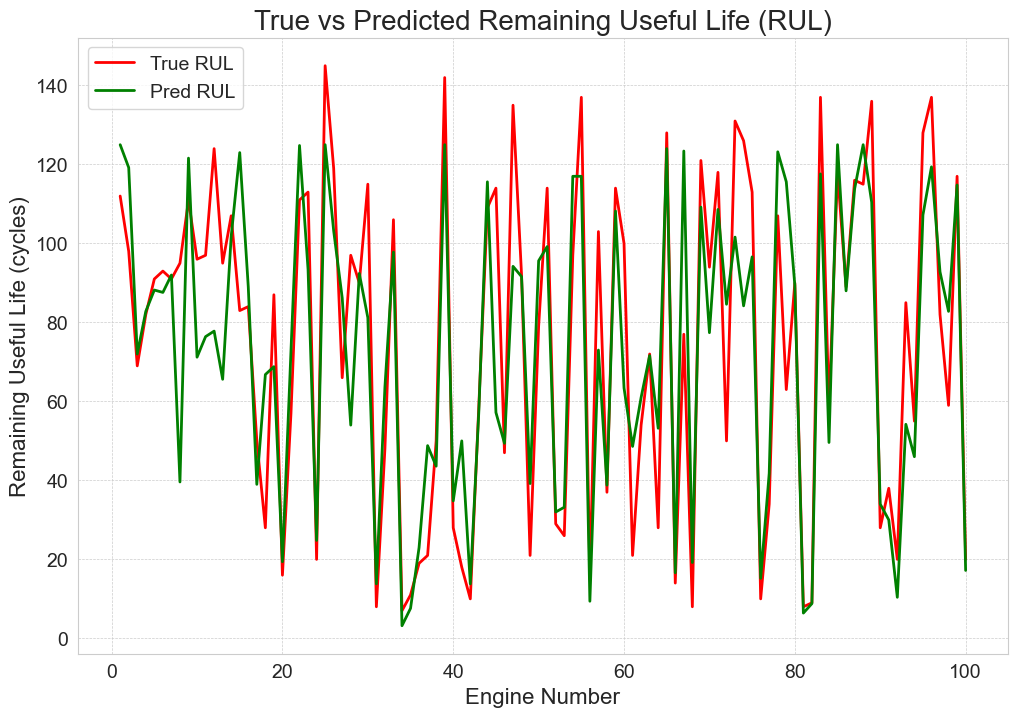

In [86]:
import matplotlib.pyplot as plt
import numpy as np


index=[]
for i in range (len(true_RUL)):
    index.append(i)
    
engine_number = df1_test['engineNumber']  

true_RUL = true_RUL
engine_number = np.arange(1, len(true_RUL)+1)
predicted_RUL = predicted_RUL.reshape(-1)

plt.figure(figsize=(12, 8))
plt.plot(engine_number, true_RUL, label='True RUL', color='red', linewidth=2)
plt.plot(engine_number, predicted_RUL, label='Pred RUL', color='green', linewidth=2)
plt.title('True vs Predicted Remaining Useful Life (RUL)', fontsize=20)
plt.xlabel('Engine Number', fontsize=16)
plt.ylabel('Remaining Useful Life (cycles)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=14)
plt.show()
